In [1]:
import distutils.util as distutils
import os
import mujoco
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media

all_variables = dir()
for name in all_variables:
    
    # Print the item if it doesn't start with '__'
    if not name.startswith('__'):
        if name == 'renderer':
            del renderer
        elif name == 'xml':
            del xml
        elif name == 'model':
            del model
        elif name == 'data':
            del data

""

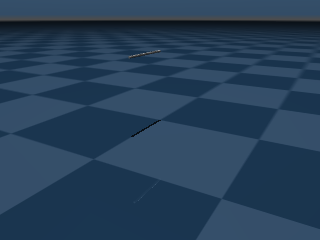

In [2]:
model = mujoco.MjModel.from_xml_path('model/rod.xml')
data = mujoco.MjData(model)
renderer = None
renderer = mujoco.Renderer(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

In [3]:
DURATION  = 3   # seconds
FRAMERATE = 60  # Hz

# Set the state and controls to their setpoints.
mujoco.mj_resetData(model, data)
mujoco.mj_resetDataKeyframe(model, data, 0)
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 3


frames = []
calc_ke = []
ret_ke = []
def ke_calc(data):
  return (1/6)*0.1*0.25*(data.qvel[0])**2

while data.time < DURATION:
  # Step the simulation.
  mujoco.mj_step(model, data)
  calc_ke.append(ke_calc(data))
  ret_ke.append(data.energy[1])
  # Render and save frames.
  if len(frames) < data.time * FRAMERATE:
    # Set the lookat point to the humanoid's center of mass.
    renderer.update_scene(data, camera)
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=FRAMERATE)

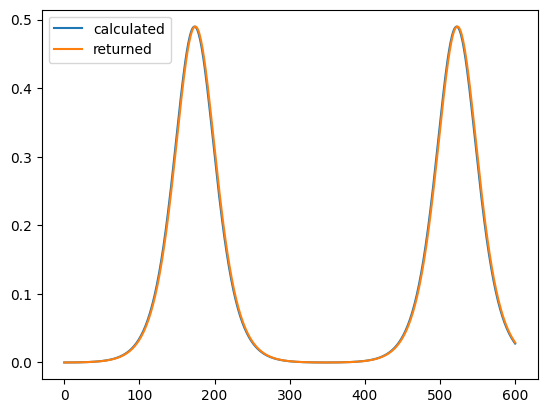

In [4]:
import matplotlib.pyplot as plt

plt.plot(calc_ke, label='calculated')
plt.plot(ret_ke, label='returned')
plt.legend()